# Recurrence Interval Plotting

In [1]:
import data_methods as dm 
import os
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import math 
from geopy import distance 

In [2]:
segment_folder = r'C:\Users\bydd1\OneDrive\Documents\Research\MS Sinuosity Data\Segments'
comparison_path = r'C:\Users\bydd1\OneDrive\Documents\Research\MS Sinuosity Data\Data from Sam\LeopoldWolmanApp8_noflume.xlsx'
compressed_discharge_path = r'C:\Users\bydd1\OneDrive\Documents\Research\MS Sinuosity Data\compressed_ra.pickle'  

In [3]:
#read leopold/wolman data transcribed by Sam 
leopold_x = pd.read_excel(comparison_path)
leopold_wave = leopold_x['Wavelength (m)'].tolist()
leopold_dis = leopold_x['Qbankfull (cms)'].tolist()

#Delete all nan-values from leopold/wolman dataset (delete corresponding values on list)
del_ind = []
leopold_wave = np.asarray(leopold_wave)
leopold_dis = np.asarray(leopold_dis)
for i in range(len(leopold_wave)):
    if np.isnan(leopold_wave[i]) or np.isnan(leopold_dis[i]):
        del_ind.append(i)
leopold_wave = np.delete(leopold_wave, del_ind)
leopold_dis = np.delete(leopold_dis, del_ind)


leo_x_ln = np.log(leopold_wave)
leo_y_ln = np.log(leopold_dis)

slope, intercept, r2, leo_theo = dm.lin_reg(leo_x_ln, leo_y_ln, 'L/w')
leo_theo = np.sort(leo_theo)
leo_x_ln_sort = np.sort(leo_x_ln)

df = pd.DataFrame({'L/W': [slope, intercept, r2]}, index = ['slope', 'intercept', 'r2'])

L/w
_______________
R^2 = 0.9441794243080932
P = 1.2776217046445632e-21
Standard Error = 0.06575225222255994
 
slope = 1.5297333430391273
intercept = -4.126201091756643
 


In [4]:
segments = os.listdir(segment_folder)
comp_x = pd.read_excel(comparison_path)

for seg in segments: #iterate through all files in 'Segments' folder 
    if seg != 'data_descriptions.txt':
        if seg[0] != '~': #weird excel coding for autosave version of file 
            print(seg)
            path = os.path.join(segment_folder, seg)
            seg_x = pd.read_excel(path)
            
            #use nearest neighbors method to assign values fom compressed_ra.pickle to segment in question 
            dm.assign_cop_to_latlon(path, compressed_discharge_path)

Seg1.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.5414016246795654 seconds ---
Seg10.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.5255634784698486 seconds ---
Seg11.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.5269482135772705 seconds ---
Seg12.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.6051120758056641 seconds ---
Seg13.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.4733579158782959 seconds ---
Seg14.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.5758540630340576 seconds ---
Seg15.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.6274831295013428 seconds ---
Seg16.xlsx
entry 0
writing new columns to dataframe...
rewriting excel

C:\Users\bydd1\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.4725959300994873 seconds ---
Seg4.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.49709343910217285 seconds ---
Seg5.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.6781606674194336 seconds ---
Seg6.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.5047197341918945 seconds ---
Seg7.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.48182153701782227 seconds ---
Seg8.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.5219771862030029 seconds ---
Seg9.xlsx
entry 0
writing new columns to dataframe...
rewriting excel file with 9 new columns...
--- 0.45062899589538574 seconds ---


In [5]:
seg_data_wave = []
seg_data_rec2 = []
seg_data_rec105 = []
seg_data_rec21 = []
peak = []
for seg in segments:        
    if seg != 'data_descriptions.txt':
        if seg[0] != '~': #weird excel coding for autosave version of file 
            path = os.path.join(segment_folder, seg)
            seg_x = pd.read_excel(path) #read the file just written 
            #get meander wavelength and discharge data 
            seg_data_wave.append(np.mean(seg_x['Meandwave'].tolist()))
            seg_data_rec2.append(np.mean(seg_x['rec2'].tolist()))
            seg_data_rec105.append(np.mean(seg_x['rec10.5'].tolist()))
            seg_data_rec21.append(np.mean(seg_x['rec21'].tolist()))
            peak.append(np.mean(seg_x['max_dis'].tolist()))
            

2 year flood
_______________
R^2 = 0.8608114220844466
P = 2.9556063775229475e-08
Standard Error = 0.13280961282726972
 
slope = 1.3211183158255244
intercept = -3.7012479612435705
 
10.5 year flood
_______________
R^2 = 0.89101373138927
P = 4.1136038181041785e-09
Standard Error = 0.10654174096059167
 
slope = 1.2185296104939907
intercept = -2.184516862897053
 
21 year flood
_______________
R^2 = 0.8958219535512584
P = 2.8604244128216325e-09
Standard Error = 0.1015024400533313
 
slope = 1.190581746623175
intercept = -1.7084296188115902
 
mean peak annual
_______________
R^2 = 0.8797732638069281
P = 9.071477018767685e-09
Standard Error = 0.11908280885553281
 
slope = 1.2885281546676364
intercept = -3.2804999187250514
 


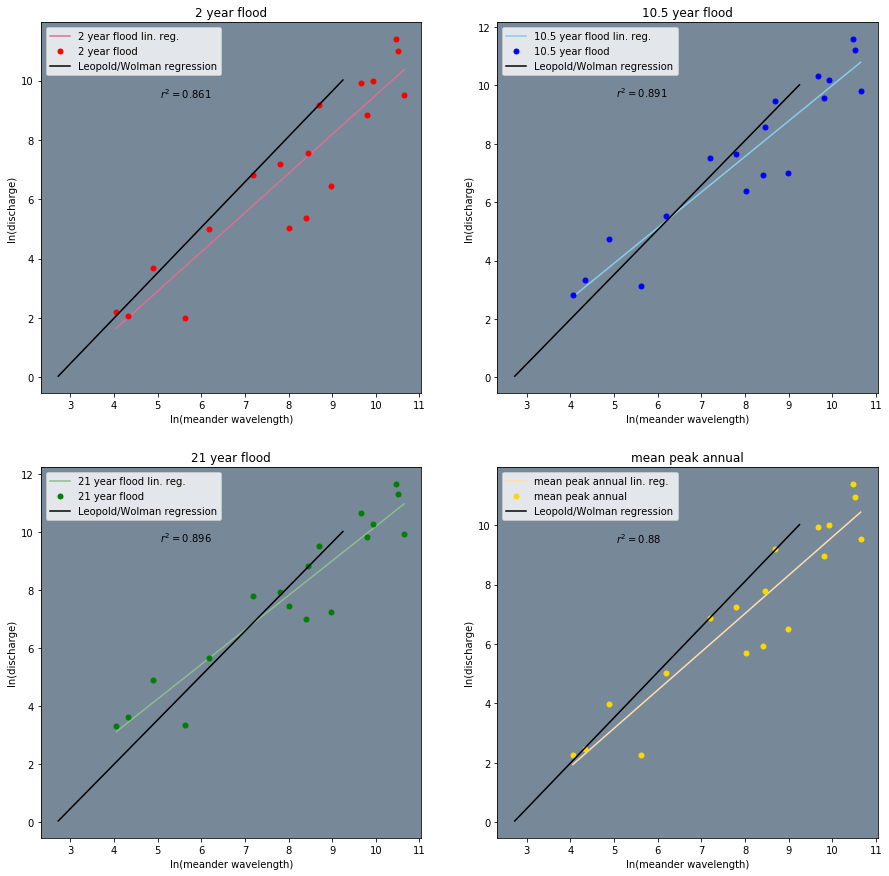

In [7]:
fig = plt.figure(figsize = (15, 15))
fig.patch.set_facecolor('white')
names = ['2 year flood', '10.5 year flood', '21 year flood', 'mean peak annual']
index = 0 
colors = ['red', 'blue', 'green', 'gold']
colors1 = ['palevioletred', 'skyblue', 'darkseagreen', 'navajowhite']

for q in [seg_data_rec2, seg_data_rec105, seg_data_rec21, peak]:
    plt.subplot(2,2, index + 1, facecolor = 'lightslategray')
    x_ln = np.log(seg_data_wave)
    y_ln = np.log(q)
    slope, intercept, r2, y_theo = dm.lin_reg(x_ln, y_ln, names[index])
    plt.title(names[index])
    plt.text(min(x_ln) + 1, max(y_ln) - 2, r'$r^{2} = $' + str(np.round(r2, 3)))
    y_theo = np.sort(y_theo)
    plt.plot(np.sort(x_ln), y_theo, '-', color = colors1[index])
    plt.plot(x_ln, y_ln, '.', markersize = 10, color = colors[index])
    
    #plt.plot(leo_x_ln, leo_y_ln, '.', markersize = 20, color = 'darkslategray')
    plt.plot(leo_x_ln_sort, leo_theo, '-', color = 'black')
    plt.legend([names[index] + ' lin. reg. ', names[index], 'Leopold/Wolman regression'])
    
    plt.xlabel('ln(meander wavelength)')
    plt.ylabel('ln(discharge)')
    df[names[index]] = [slope, intercept, r2]

    index += 1
    
    

In [8]:
df

,L/W,10.5 year flood,21 year flood,mean peak annual,2 year flood
slope,1.529733,1.218530,1.190582,1.288528,1.321118
intercept,-4.126201,-2.184517,-1.708430,-3.280500,-3.701248
r2,0.944179,0.891014,0.895822,0.879773,0.860811
